In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
import scipy.stats as stats
from scipy.stats import ttest_ind_from_stats

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

I downloaded this dataset from Kaggle. The data set has 14 features. 9 of those features are catagorical and 5 are continous. I was curious to figure which variable are most reliable in indicating whether a patient is likely to suffer from Heart disease. There isn't much cleaning involved in this dataset. and there are only 303 total rows with no null values. 

In [63]:
df = pd.read_csv(r'C:\Users\Rahul Miglani\Downloads\heart-disease-uci\Heart.csv')

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [71]:
#look at the shape of the dataset
df.shape

(303, 14)

In [72]:
# Lets take a look at overview stats of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [73]:
#check if there are any null values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Here is what all the columns mean in the dataset
age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular 

hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

### Exploring the Data

In [15]:
# I created a new feature that is an estimation of expected HR of a patient by subtracting their age from 220. 
df['exthalach']= 220-df['age']

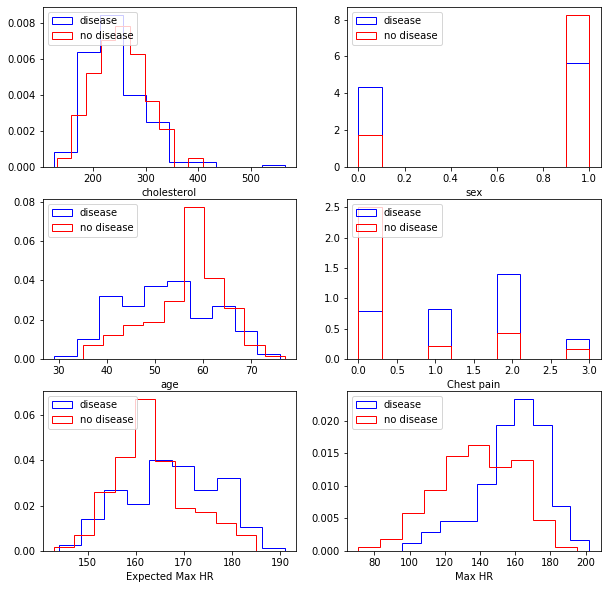

In [17]:
## lets explore sex of the patients with other categorical and continous variables
fig, axes = plt.subplots( nrows=3, ncols=2, figsize=(10,10) )
bins = np.linspace(20, 80, 15)
axes[0,0].hist(df[df.target>0].chol,color=["blue"],histtype="step",label="disease",density=True)
axes[0,0].hist(df[df.target==0].chol,color=["red"],histtype="step",label="no disease",density=True)
axes[0,0].set_xlabel("cholesterol")
axes[0,0].legend(prop={'size': 10},loc="upper right")
axes[0,0].legend(prop={'size': 10},loc="upper left")

axes[0,1].hist(df[df.target>0].sex,color=["blue"],histtype="step",label="disease",density=True)
axes[0,1].hist(df[df.target==0].sex,color=["red"],histtype="step",label="no disease",density=True)
axes[0,1].set_xlabel("sex")
axes[0,1].legend(prop={'size': 10},loc="upper right")
axes[0,1].legend(prop={'size': 10},loc="upper left")

axes[1,0].hist(df[df.target>0].age.tolist(),color=["blue"],histtype="step",label="disease",density=True)
axes[1,0].hist(df[df.target==0].age,color=["red"],histtype="step",label="no disease",density=True)
axes[1,0].set_xlabel("age")
axes[1,0].legend(prop={'size': 10},loc="upper right")
axes[1,0].legend(prop={'size': 10},loc="upper left")


axes[1,1].hist(df[df.target>0].cp,color=["blue"],histtype="step",label="disease",density=True)
axes[1,1].hist(df[df.target==0].cp,color=["red"],histtype="step",label="no disease",density=True)
axes[1,1].set_xlabel("Chest pain")
axes[1,1].legend(prop={'size': 10},loc="upper right")
axes[1,1].legend(prop={'size': 10},loc="upper left")

axes[2,0].hist(df[df.target>0].exthalach,color=["blue"],histtype="step",label="disease",density=True)
axes[2,0].hist(df[df.target==0].exthalach,color=["red"],histtype="step",label="no disease",density=True)
axes[2,0].set_xlabel("Expected Max HR")
axes[2,0].legend(prop={'size': 10},loc="upper right")
axes[2,0].legend(prop={'size': 10},loc="upper left")

axes[2,1].hist(df[df.target>0].thalach,color=["blue"],histtype="step",label="disease",density=True)
axes[2,1].hist(df[df.target==0].thalach,color=["red"],histtype="step",label="no disease",density=True)
axes[2,1].set_xlabel('Max HR')
axes[2,1].legend(prop={'size': 10},loc="upper right")
axes[2,1].legend(prop={'size': 10},loc="upper left")

plt.show()

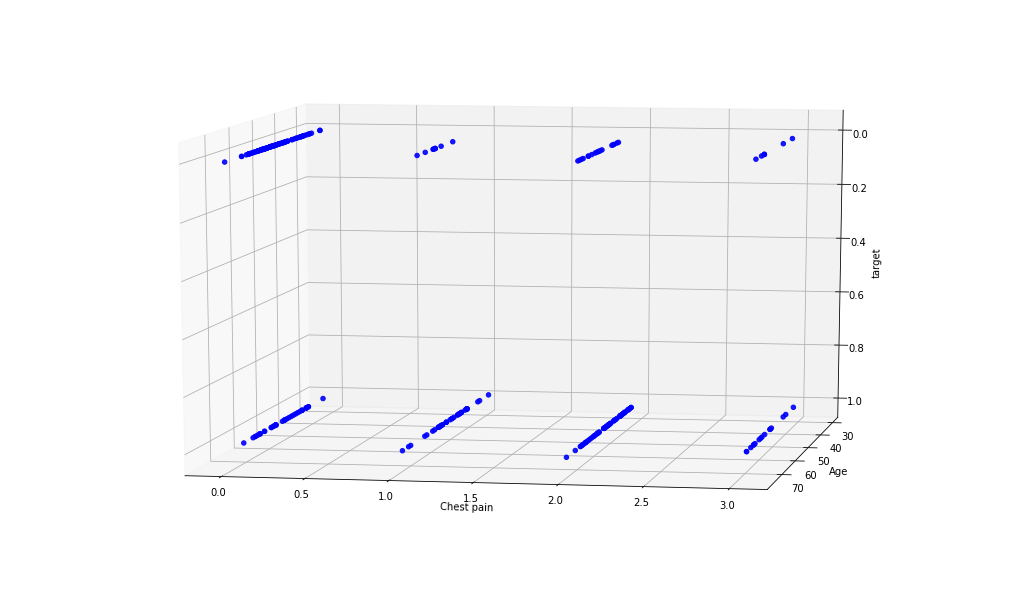

In [75]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(14, 8))
# create 3d axis object to use and set rotation for good view
ax = Axes3D(fig, elev=190, azim=-100)
ax.scatter(df['cp'],df['age'], df['target'], c= 'b' , cmap='tab20b', alpha=0.9)
ax.set_xlabel('Chest pain')
ax.set_ylabel('Age')
ax.set_zlabel('target')
plt.show()

### Hypotheses- 
1. Male patients are more likely to have heart disease(mean of male vs female with HD --T-test) 
2. Patients in age range 40-50 are more likely to have heart disease (plot age and divide it ) 
3. Increase in chest pain increases the chance of Heart disease. 

In [76]:
#since there is dsiporportion of gender in the dataset I am taking a ranndom sample to compare 
df['m'] = df['sex'].sample(n=100, random_state = 1)

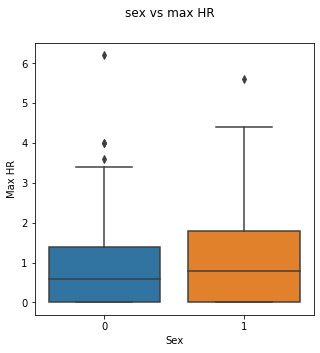

In [80]:
sns.boxplot( x=df["sex"], y=df["oldpeak"], data = df)
rcParams['figure.figsize'] = 5, 5
plt.suptitle('sex vs max HR')
plt.xlabel('Sex')
plt.ylabel('Max HR')
plt.show()



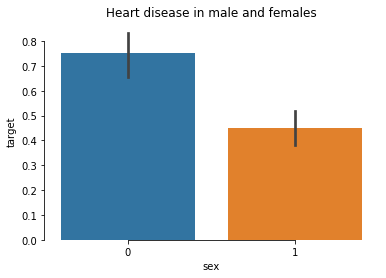

In [77]:
# boxplot of sex and target
ax = sns.barplot(x='sex',y='target',data=df)  
plt.title('Heart disease in male and females')
sns.despine(offset=0, trim=True)
ax.set(xlabel='sex', ylabel='target')

plt.show()

In [29]:
## 1. AVG of Male vs Female with Heart condition 
df.groupby('sex').agg(['mean','std','count'])

age                        cp                    trestbps  \
          mean       std count      mean       std count        mean   
sex                                                                    
0    55.677083  9.409396    96  1.041667  0.972427    96  133.083333   
1    53.758454  8.883803   207  0.932367  1.059064   207  130.946860   

                            chol  ...  thal    target                  \
           std count        mean  ... count      mean       std count   
sex                               ...                                   
0    19.311119    96  261.302083  ...    96  0.750000  0.435286    96   
1    16.658246   207  239.289855  ...   207  0.449275  0.498626   207   

      exthalach                    m             
           mean       std count mean  std count  
sex                                              
0    164.322917  9.409396    96  0.0  0.0    38  
1    166.241546  8.883803   207  1.0  0.0    62  

[2 rows x 45 columns]

In [30]:
ttest_ind_from_stats(mean1=.75, std1=.435286, nobs1=96,
                     mean2=.449275, std2=.498626, nobs2=207)

Ttest_indResult(statistic=5.078608361731469, pvalue=6.678463520706434e-07)

My hypothesis was that men are more likely to suffere from Heart disease than women. The t-value of the sample is 5.07 with a p-value of 6.67e-07. THe t-value of 5.07 is quite large indicating there is an actual difference between men and women and their risk of suffereing from Heart disease. The p-value of .0000000667 indicates the difference in t-values is significant because p-values<0.05 are significant. Since there was difference in number of men and women in the dataset, I took a random sample of 100 patients from the data and then conducted another t-test. THis new T test resulting in a t-value of 3.07 and p-value of 0.003496 still indicating that the risk of Heart disease is significant between men and women. 

In [31]:
# random sample of the gender 
df.groupby('m').agg(['mean','std','count'])

age                  sex                   cp                  \
          mean       std count mean  std count      mean       std count   
m                                                                          
0.0  57.263158  8.036014    38    0  0.0    38  1.184211  1.061749    38   
1.0  54.064516  8.916500    62    1  0.0    62  0.919355  1.135109    62   

       trestbps  ...    ca      thal                    target            \
           mean  ... count      mean       std count      mean       std   
m                ...                                                       
0.0  135.684211  ...    38  2.157895  0.369537    38  0.763158  0.430851   
1.0  131.854839  ...    62  2.354839  0.748699    62  0.403226  0.494550   

            exthalach                  
    count        mean       std count  
m                                      
0.0    38  162.736842  8.036014    38  
1.0    62  165.935484  8.916500    62  

[2 rows x 45 columns]

In [32]:
ttest_ind_from_stats(mean1=.763158, std1=.430851, nobs1=38,
                     mean2=.403226, std2=.494550, nobs2=62)

Ttest_indResult(statistic=3.7052266129760225, pvalue=0.00034964598798889566)

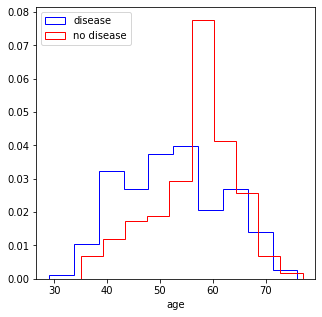

In [86]:
# Here is  graph of patient's age, Blue indicates Heart disease and red indicates No disease. 
plt.hist(df[df.target>0].age,color=["blue"],histtype="step",label="disease",density=True)
plt.hist(df[df.target==0].age,color=["red"],histtype="step",label="no disease",density=True)
plt.xlabel("age")
plt.legend(prop={'size': 10},loc="upper right")
plt.legend(prop={'size': 10},loc="upper left")
plt.show()

In [88]:
# 2. patients older than 45 are more likely to suffer from heart disease. 
old_hd = df.loc[df['age']>50]
old_hd.agg(['mean','std','count'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,m
mean,59.375000,0.668269,0.918269,134.802885,252.846154,0.187500,0.490385,144.552885,0.375000,1.210096,1.341346,0.889423,2.346154,0.475962,0.591549
std,5.603118,0.471971,1.062334,18.541104,54.382572,0.391254,0.538296,22.511985,0.485291,1.204558,0.616850,1.017852,0.655990,0.500627,0.495046
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,71.000000


In [90]:
young = df.loc[df['age']<=50]
young.agg(['mean','std','count'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,m
mean,43.400000,0.715789,1.073684,124.663158,231.852632,0.063158,0.610526,160.800000,0.221053,0.666316,1.526316,0.378947,2.242105,0.694737,0.689655
std,4.337859,0.453430,0.959190,12.642894,42.572084,0.244537,0.490218,19.657493,0.417157,0.964763,0.598617,0.947325,0.499272,0.462962,0.470824
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,29.000000


In [91]:
ttest_ind_from_stats(mean1=.475962, std1=.500627, nobs1=208,
                     mean2=.694737, std2=.462962, nobs2=95)

Ttest_indResult(statistic=-3.611641900162328, pvalue=0.00035636818591303104)

My hypothesis that patients older than the age of 50 have higher risk of suffering from Heart disease than patients 50 and younger. The T test of the two groups resulted in t-value of 3.61 indicating that the two groups are 3.6 times different from each other and the p-value of .000357 indicate that the difference between two groups is significant. I believe that this could be due to the disporportion in the number of patients older and younger than 50. I believe if there is more data than there would still be difference between the two groups and significant. since the data set has less patients of the age younger than 50and most of them are sufferening from Heart Disease, the t test results a bigger value.

In [49]:
# The more the chest pain the higher the chance of Heart disease
pain = df.loc[df['cp']>=2]
no_pain = df.loc[df['cp']<=1]

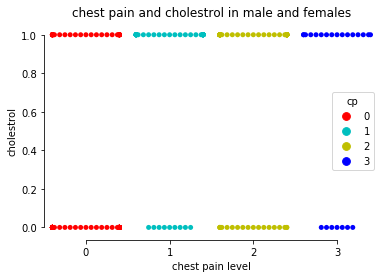

In [60]:
ax = sns.swarmplot(x='cp',y='target',hue = 'cp',palette=["r", "c", "y",'b'] data=df)  
plt.title('chest pain and cholestrol in male and females')
sns.despine(offset=0, trim=True)
ax.set(xlabel='chest pain level', ylabel='cholestrol')

plt.show()

In [ ]:
pain.agg(['mean','std','count'])

In [53]:
no_pain.agg(['mean', 'std', 'count'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,exthalach,m
mean,54.569948,0.704663,0.259067,131.082902,248.746114,0.119171,0.512953,146.207254,0.435233,1.106736,1.367876,0.823834,2.367876,0.414508,165.430052,0.661290
std,8.821525,0.457380,0.439262,17.525082,49.467401,0.324832,0.531398,23.992155,0.497077,1.236934,0.607594,1.035843,0.640966,0.493918,8.821525,0.477134
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,62.000000


In [56]:
ttest_ind_from_stats(mean1=.772727, std1=.420988, nobs1=110,
                     mean2=.414508, std2=.493918, nobs2=193)

Ttest_indResult(statistic=6.395815395444218, pvalue=6.089574425451622e-10)

Hypothesis = Patients with more chest pain are likely to suffer from Heart dissease. The null hypothesis is accepted because the t-value of 6.4 with a p-value of 6.1e-10 indicates the difference between two groups is very significant. Patients with severe chest pain are suffering from Heart disease than patients with less or no chest pain. 

The dataset has insufficient data to provide with us with more reliable indicators of Heart disease. Eventhough there are limitations to our dataset, it has some useful features that can be reliable indicators of presence of Heart disease. For example the difference between chest pain types is a useful feature to detect presence of Heart disease in patients. The dataset was not equal in number men and women so a larger dataset will definetly help eliminate any errors impacting the differences between men and women. 